In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.10.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
data_credits= pd.read_csv('tmdb_5000_credits.csv')
data_movies =  pd.read_csv('tmdb_5000_movies.csv',index_col='id')

y=data_movies['vote_average']

# Data Analysis : 

In [4]:
data_movies.isna().sum()

budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [5]:
num_cols_mov = list(data_movies.select_dtypes(exclude='object').drop('vote_average',axis=1).columns)
cat_cols_mov = list(data_movies.select_dtypes(include='object').columns)

data_num = data_movies[num_cols_mov  + ['vote_average']]

/var/folders/1d/_dkbpd6n5455_f67v1wm6v140000gn/T/ipykernel_89479/2965909314.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols_mov = list(data_movies.select_dtypes(include='object').columns)


In [6]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

class CategoricalVisualizer:
    def __init__(self, palette="Set2", figsize_unit=(6, 5)):
        self.palette = palette
        self.figsize_unit = figsize_unit

    def plot_counts(self, df, columns, title='Distribution of Categorical Variables'):
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3)
        
        fig, axes = plt.subplots(
            n_rows, 3, 
            figsize=(self.figsize_unit[0] * 3, self.figsize_unit[1] * n_rows)
        )
        fig.suptitle(title, fontsize=16)
        axes = axes.flatten()

        for i, col in enumerate(columns):
            order = df[col].value_counts().index
            
            sns.countplot(
                data=df, x=col, ax=axes[i], 
                palette=self.palette, order=order
            )
            
            axes[i].set_title(f'{col.replace("_", " ").title()}')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', rotation=45)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    
    def plot_boxplots(self, df, columns, target, title='Categorical Features vs Target'):
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3) 
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 6))
        fig.suptitle(title, fontsize=16, fontweight='bold')
        axes = axes.flatten()

        for i, col in enumerate(columns):
            order = df.groupby(col)[target].median().sort_values().index
            
            sns.boxplot(
                data=df, x=col, y=target, ax=axes[i], 
                palette=self.palette, order=order,
                showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}
            )
            
            axes[i].set_title(f'{col.replace("_", " ").title()} vs {target.title()}')
            axes[i].set_xlabel('')
            axes[i].tick_params(axis='x', rotation=45)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

class NumericalVisualizer:
    def __init__(self, palette="viridis", bins=30):
        self.palette = sns.color_palette(palette)
        self.bins = bins

    def plot_distributions(self, df, columns, title='Distribution of Numerical Variables'):
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3) 
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
        fig.suptitle(title, fontsize=18, fontweight='bold')
        axes = axes.flatten()

        for i, col in enumerate(columns):
            color = self.palette[i % len(self.palette)]
            
            sns.histplot(
                data=df, x=col, ax=axes[i], 
                kde=True, color=color, bins=self.bins
            )
            
            axes[i].set_title(f'Distribution: {col.replace("_", " ").title()}', fontsize=14)
            axes[i].set_xlabel('')
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.97])
        plt.show()
    
    def plot_regressions(self, df, columns, target, n_samples=500, title='Numerical Features vs Target'):
        df_sample = df.sample(n=min(n_samples, len(df)), random_state=42)
        
        n_cols = len(columns)
        n_rows = math.ceil(n_cols / 3)
        
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 6))
        fig.suptitle(title, fontsize=16, fontweight='bold')
        axes = axes.flatten()

        for i, col in enumerate(columns):
            color = self.palette[i % len(self.palette)]
            
            sns.regplot(
                data=df_sample, x=col, y=target, ax=axes[i],
                scatter_kws={'alpha':0.5, 's':30}, 
                line_kws={'color': 'red', 'lw': 2}, 
                color=color
            )
            

            correlation = df[col].corr(df[target])
            axes[i].set_title(f'{col.title()} vs {target.title()} (Corr: {correlation:.2f})')
            axes[i].set_xlabel(col.replace("_", " ").title())
            axes[i].set_ylabel(target.title())


        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    
    def plot_heatmap(self, df, columns, target, title='Correlation Heatmap'):
        cols_to_corr = columns + [target]
        corr_matrix = df[cols_to_corr].corr()

        plt.figure(figsize=(8, 6))
        

        sns.heatmap(            
            corr_matrix, 
            annot=True,           
            fmt=".2f",            
            cmap='coolwarm',      
            center=0,             
            linewidths=.5, 
            cbar_kws={"shrink": .8}
        )

        plt.title(title, fontsize=16, fontweight='bold', pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.show()

**Numerical Analysis**

In [7]:
data_num_2 = (data_num - data_num.mean()) /( data_num.std())# log + centré et réduit

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/internals/blocks.py:347: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


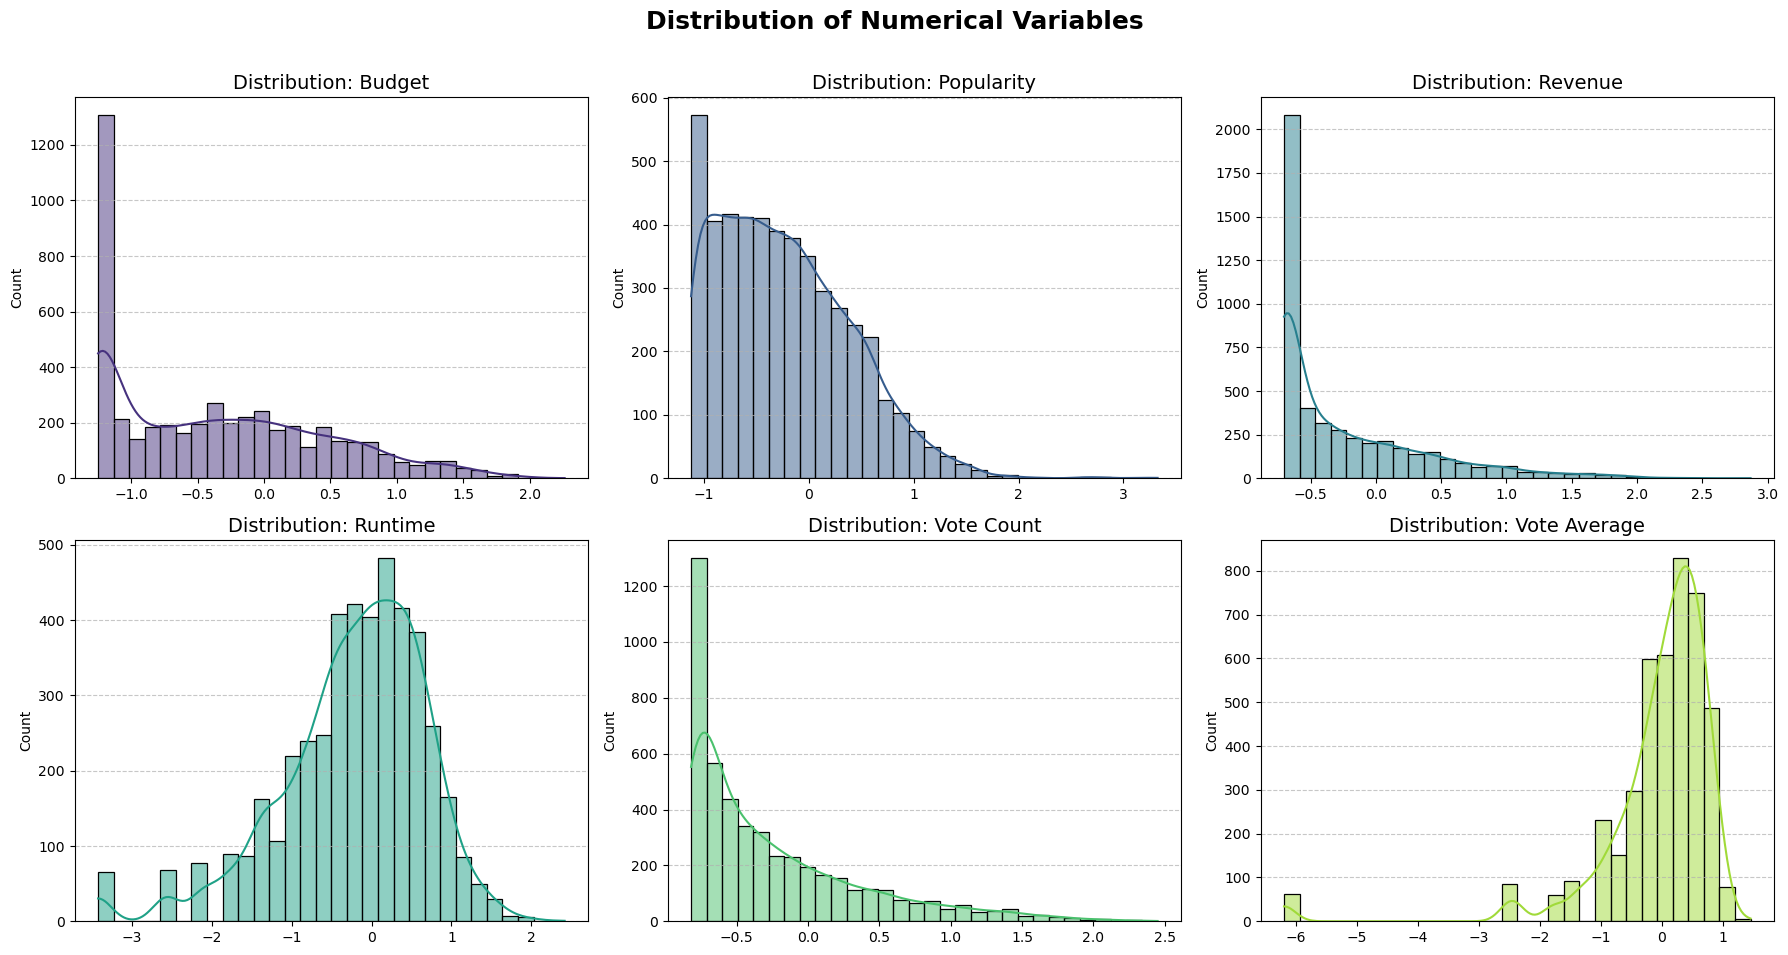

In [8]:
num_viz = NumericalVisualizer()

num_viz.plot_distributions(np.log1p(data_num_2),num_cols_mov+['vote_average'])

Some distribution seem gaussian 

/opt/anaconda3/lib/python3.13/site-packages/pandas/core/internals/blocks.py:347: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


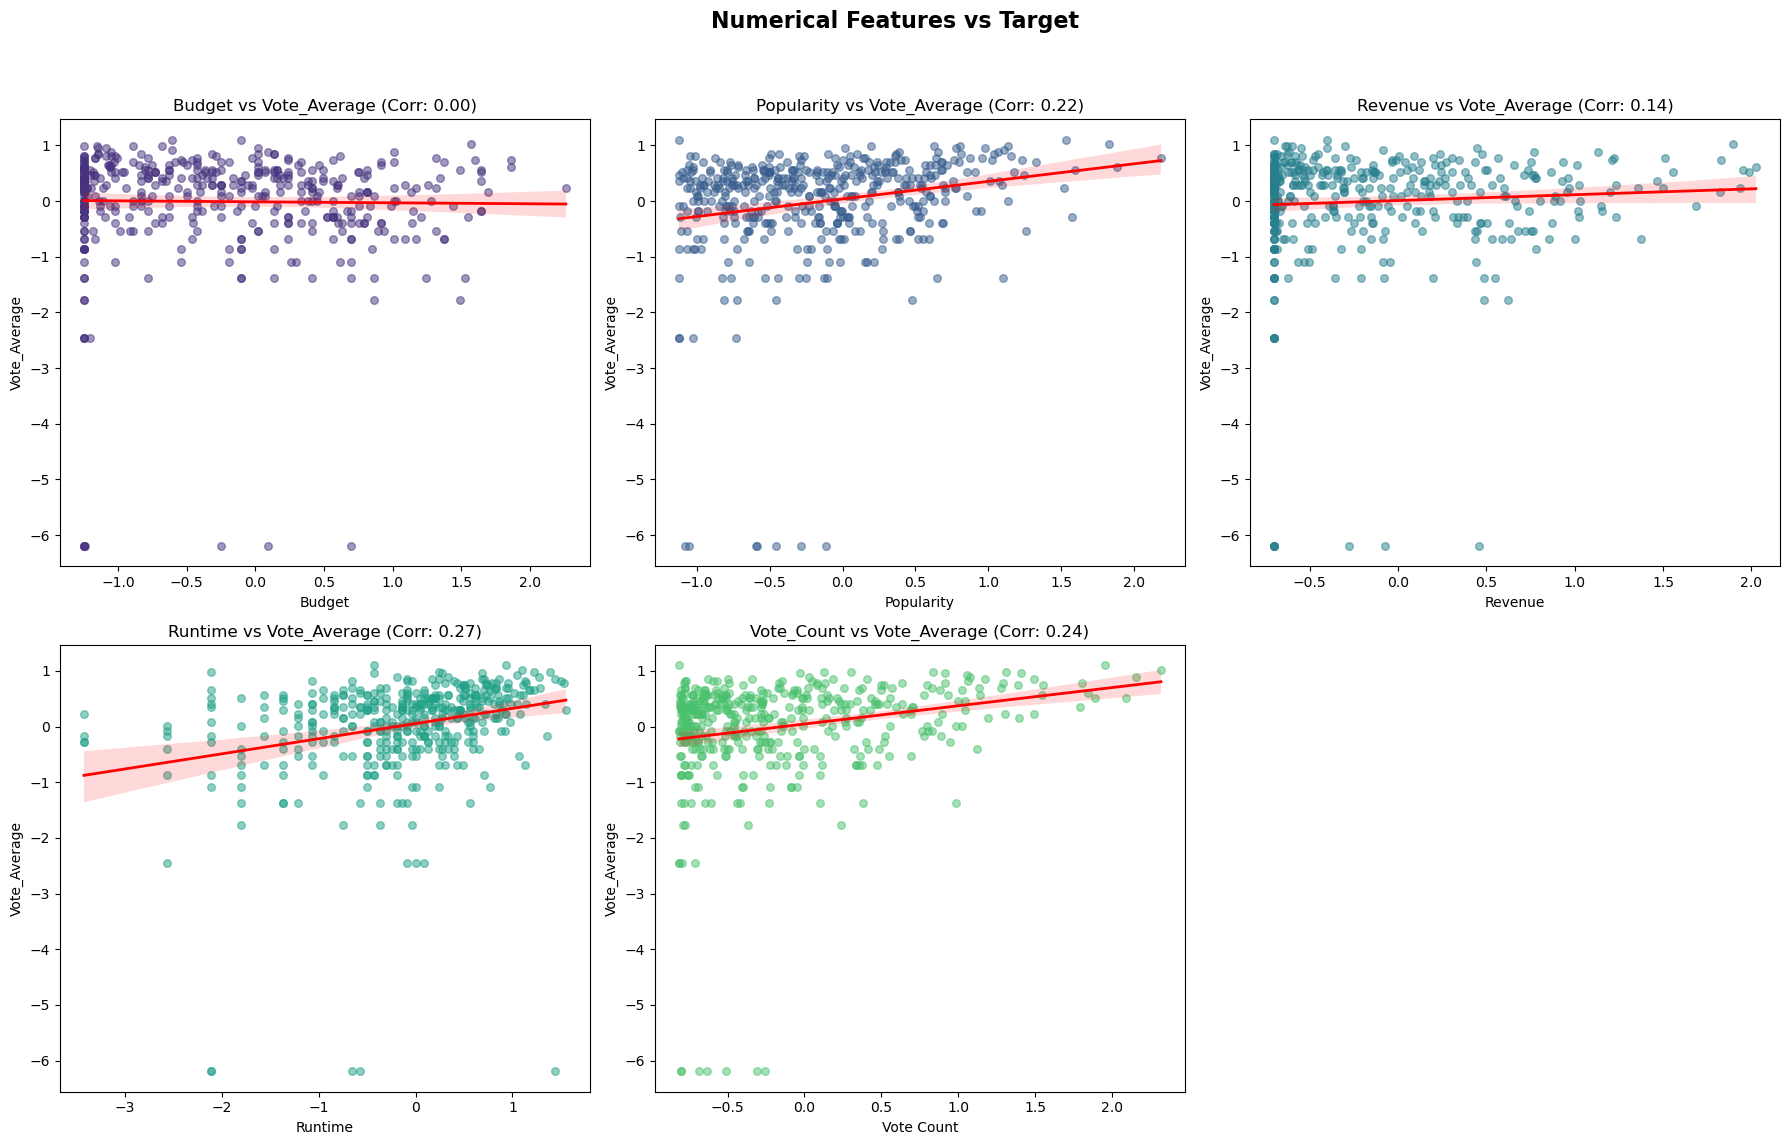

In [9]:
num_viz.plot_regressions(np.log1p(data_num_2),num_cols_mov,target='vote_average')

The features are not quite correlated to the target : Vote Average. Let's plot a heat map : 

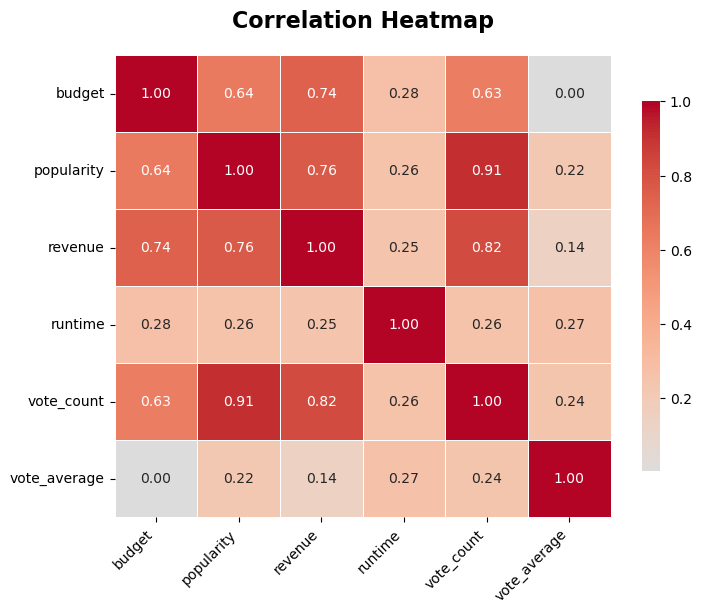

In [10]:
num_viz.plot_heatmap(np.log1p(data_num_2),num_cols_mov,'vote_average')

**Categorical Analysis**

In [11]:
data_movies[cat_cols_mov]
#homepage : si il y a 1, sinon 0 . -> à voir si ça à de l'importance

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
id,,,,,,,,,,,,,
19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar
285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End
206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre
49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises
49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi
72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,[],[],2011-12-26,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds
231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered"


**Let's start with homepage importance :**

<Axes: xlabel='homepage_enc', ylabel='count'>

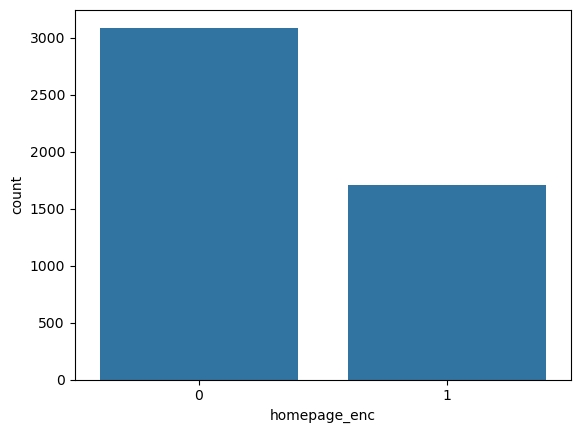

In [12]:
col = data_movies["homepage"].notna().astype(int)
data_movies['homepage_enc']= col

sns.countplot(x=data_movies['homepage_enc'])

<Axes: xlabel='homepage_enc', ylabel='vote_average'>

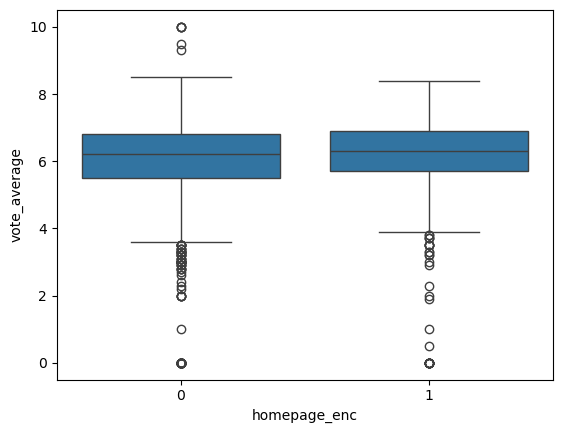

In [13]:
sns.boxplot(data=data_movies,x='homepage_enc',y='vote_average')

Many outliers

<Axes: xlabel='homepage_enc', ylabel='vote_average'>

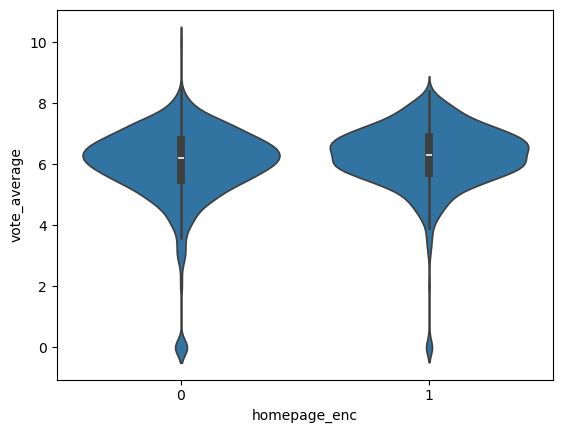

In [14]:
sns.violinplot(data=data_movies,x='homepage_enc',y='vote_average')

In [15]:
corr = data_movies['vote_average'].corr(data_movies["homepage_enc"])
print(corr) 

0.09502274712627831


In [16]:
cor2 = data_movies['vote_count'].corr(data_movies["homepage_enc"])
print(cor2) 

0.30394754232389265


if a movie got a website, it is moke likely to be popular and have more vote.

SUM UP -> weak correlation : we're gonna drop this feature.

**Genre**

In [17]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer

#genre labels are json -> transform into list

def extract_genres(genres_str):
    genres_list = ast.literal_eval(genres_str)
    return [g['name'] for g in genres_list]

data_movies['genres_list'] = data_movies['genres'].apply(extract_genres)

data_movies['genres_list']


mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(data_movies['genres_list'])

import pandas as pd
df_genres = pd.DataFrame(genres_encoded, columns=mlb.classes_, index=data_movies.index)
df = pd.concat([data_movies, df_genres], axis=1) # OneHot encoded genres


/var/folders/1d/_dkbpd6n5455_f67v1wm6v140000gn/T/ipykernel_89479/2693058846.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/1d/_dkbpd6n5455_f67v1wm6v140000gn/T/ipykernel_89479/2693058846.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/1d/_dkbpd6n5455_f67v1wm6v140000gn/T/ipykernel_89479/2693058846.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/1d/_dkbpd6n5455_f67v1wm6v140000gn/T/ipykernel_89479/2693058846.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

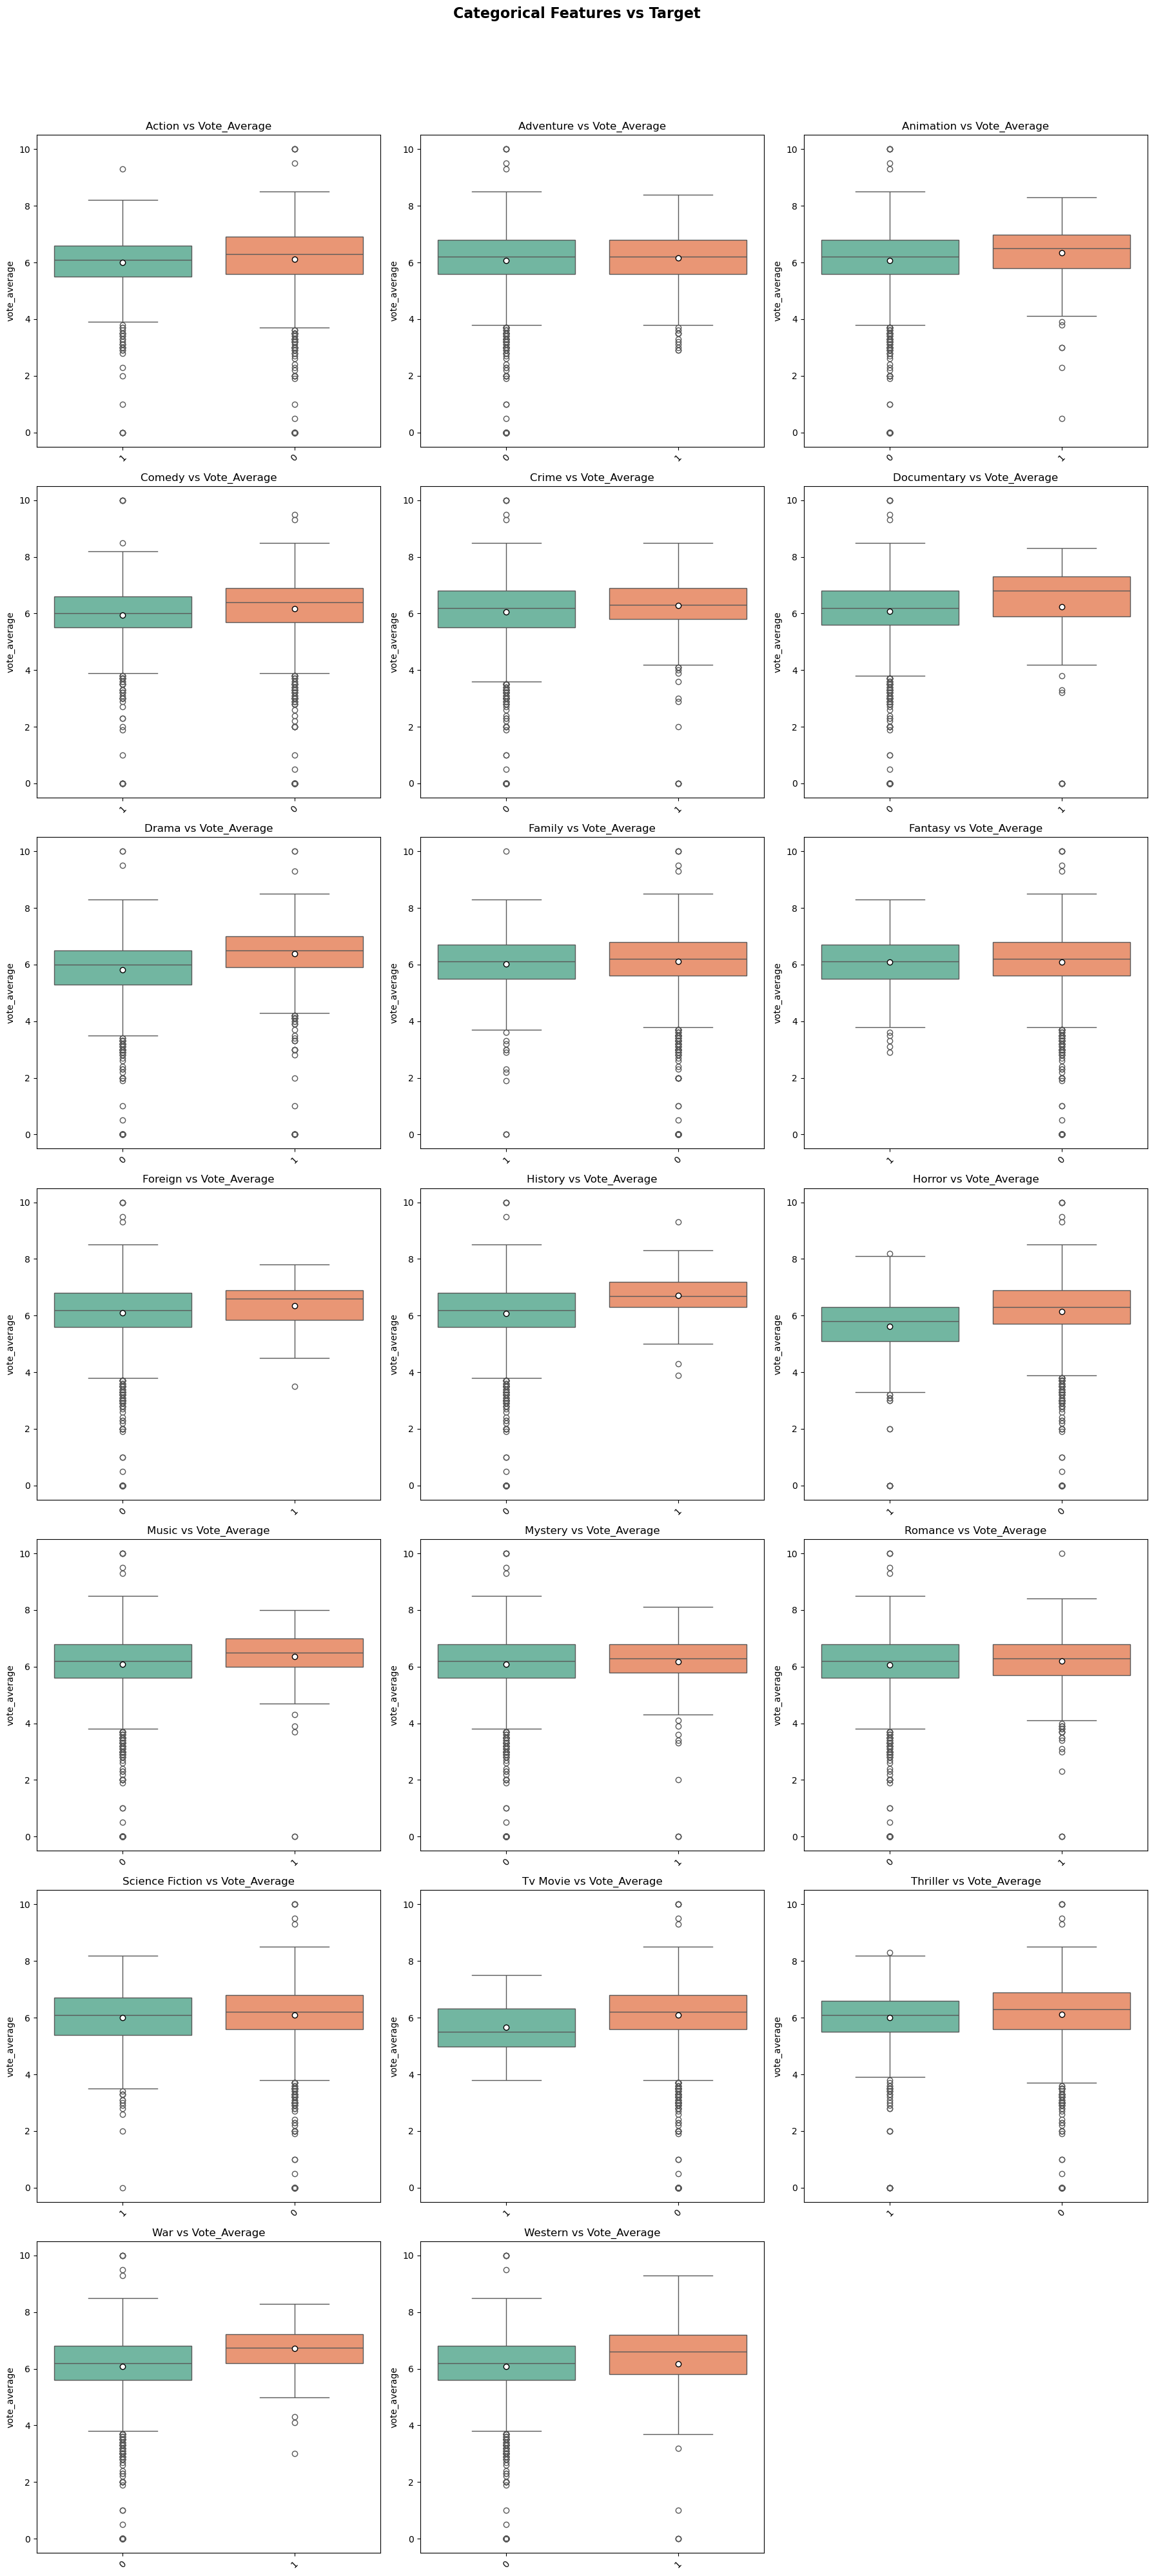

In [18]:
cat_viz= CategoricalVisualizer()

cat_viz.plot_boxplots(df=df,columns=list(df_genres.columns),target='vote_average')

Many outliers to fix

In [19]:
df['status'].shape[0]

4803

**Status**

In [20]:
n_released = df[df['status']=='Released'].shape[0] / df['status'].shape[0] * 100
n_postprod = df[df['status']=='Post Production'].shape[0] / df['status'].shape[0] * 100
n_rumored = df[df['status']=='Rumored'].shape[0] / df['status'].shape[0] * 100

print('Released : ' + str(round(n_released,2)) + '%'  + ' ; ','Post Production : ' +str(round(n_postprod,2)) + '%' + ' ; ',
      'Rumored : '+ str(round(n_rumored,2)) + '%')

Released : 99.83% ;  Post Production : 0.06% ;  Rumored : 0.1%


Most of the movies are already released. Insignificant in post production or rumored.

**Release Date**

In [21]:
df['release_date'] 

id
19995     2009-12-10
285       2007-05-19
206647    2015-10-26
49026     2012-07-16
49529     2012-03-07
             ...    
9367      1992-09-04
72766     2011-12-26
231617    2013-10-13
126186    2012-05-03
25975     2005-08-05
Name: release_date, Length: 4803, dtype: str

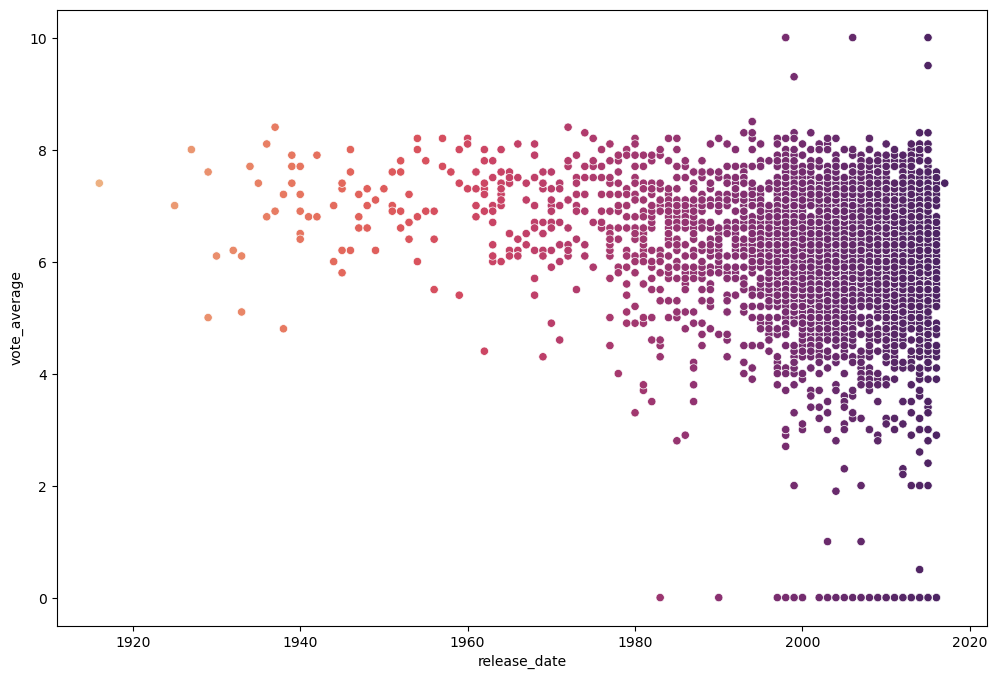

In [22]:
r_date = df['release_date'].str.slice(0,4)
r_date = pd.concat([r_date,df['vote_average']],axis=1)
r_date = r_date.dropna().astype(float)

plt.figure(figsize=(12,8))
ax=sns.scatterplot(data=r_date,x='release_date',y='vote_average',hue='release_date',palette='flare',legend=False)
plt.show()

Let's visualize how mush the slope change between 20 year's period : 

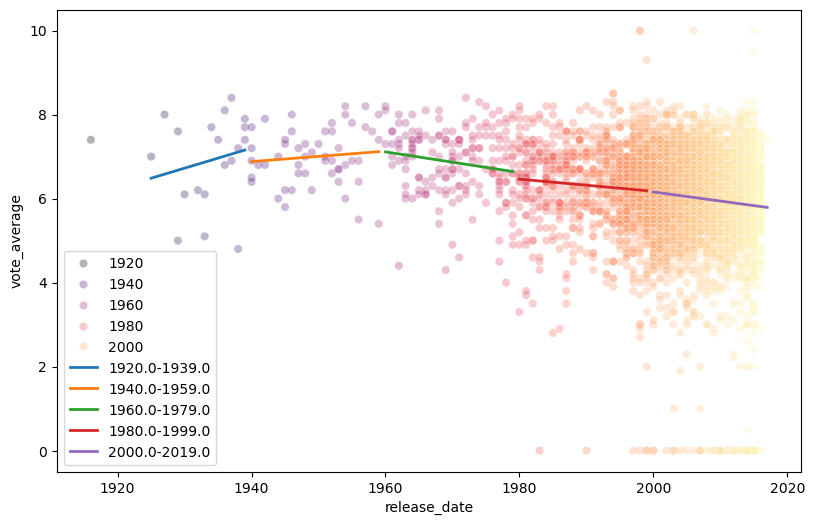

In [23]:
r_date['period_20y'] = (r_date['release_date'] // 20) * 20

plt.figure(figsize=(6*1.6,6))
sns.scatterplot(
    data=r_date,
    x='release_date',
    y='vote_average',
    hue='release_date',
    palette='magma',
    alpha=0.3
)

for period, df_p in r_date.groupby('period_20y'):
    if len(df_p) > 10:
        X = df_p['release_date']
        y = df_p['vote_average']
        coef = np.polyfit(X, y, 1)

        x_line = np.array([X.min(), X.max()])
        y_line = coef[0] * x_line + coef[1]

        plt.plot(x_line, y_line, linewidth=2, label=f'{period}-{period+19}')

plt.legend()

Before 1940, the lack of data can be an issue and not representative of the period.

**Next : Keyword**

In [27]:
pd.DataFrame(data_movies['keywords'])

,keywords
id,
19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
...,...
9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi..."
72766,[]
231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam..."


Clustering in order to regroup the keywords that are related to each other : which group is relevant or not ?

In [78]:
data_movies2 = data_movies.copy()

In [116]:
import pandas as pd
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer


def extract_keywords(s):
    if pd.isna(s) or s == '[]':
        return []
    try:
        kws_list = ast.literal_eval(s)
        return [d['name'] for d in kws_list]
    except:
        return []

data_movies2['keywords_list'] = data_movies2['keywords'].apply(extract_keywords)


all_keywords = [kw for kws in data_movies2['keywords_list'] for kw in kws]
keyword_counts = Counter(all_keywords)
top_keywords = [kw for kw, count in keyword_counts.most_common(40)]  # top 26


data_movies2['keywords_filtered'] = data_movies2['keywords_list'].apply(lambda kws: [kw for kw in kws if kw in top_keywords])


mlb = MultiLabelBinarizer(classes=top_keywords)
df_keywords = pd.DataFrame(mlb.fit_transform(data_movies2['keywords_filtered']),
                           columns=mlb.classes_,
                           index=data_movies2.index)





cluster
0    6.085859
1    6.045698
2    6.898077
3    6.231148
4    6.551462
5    6.667742
Name: vote_average, dtype: float64
cluster2
-1      6.323152
 0      6.002381
 1      6.204545
 2      6.317391
 3      5.360000
          ...   
 113    5.900000
 114    6.100000
 115    6.133333
 116    6.366667
 117    5.833333
Name: vote_average, Length: 119, dtype: float64


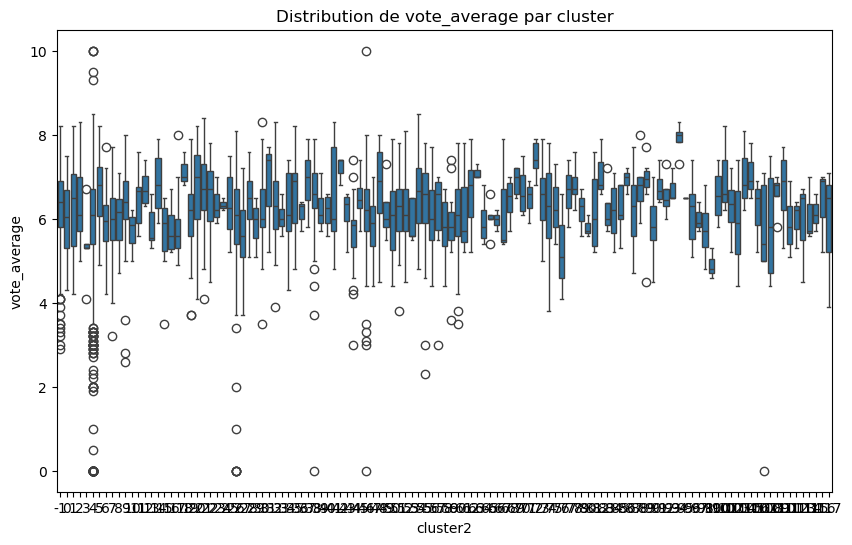

,cluster2,vote_average
id,,
19995,-1,7.2
285,0,6.9
206647,-1,6.3
49026,1,7.6
49529,-1,6.1
...,...,...
9367,4,6.6
72766,4,5.9
231617,4,7.0


In [ ]:
from sklearn.cluster import KMeans

X = df_keywords  

kmeans = KMeans(n_clusters=6, random_state=42)
data_movies2['cluster'] = kmeans.fit_predict(X)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=3)
data_movies2['cluster2'] = db.fit_predict(X)

data = pd.concat([data_movies2['cluster'],data_movies2['vote_average']],axis=1)
data2 = pd.concat([data_movies2['cluster2'],data_movies2['vote_average']],axis=1)


# Moyenne des votes par cluster
cluster_mean = data.groupby('cluster')['vote_average'].mean()
print(cluster_mean)

cluster_mean2 = data2.groupby('cluster2')['vote_average'].mean()
print(cluster_mean2)

# Boxplot pour visualiser la distribution
plt.figure(figsize=(10,6))
sns.boxplot(x='cluster2', y='vote_average', data=data2)
plt.title("Distribution de vote_average par cluster")
plt.show()

data2

**Original Language**

In [120]:
data_movies['original_language'].unique()

<ArrowStringArray>
['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn', 'it', 'nl',
 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is', 'tr', 'nb', 'af', 'pl',
 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa', 'no', 'sl', 'ps', 'el']
Length: 37, dtype: str

/var/folders/1d/_dkbpd6n5455_f67v1wm6v140000gn/T/ipykernel_89479/418470498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_rating_by_lang.index, y=mean_rating_by_lang.values, palette="rocket")


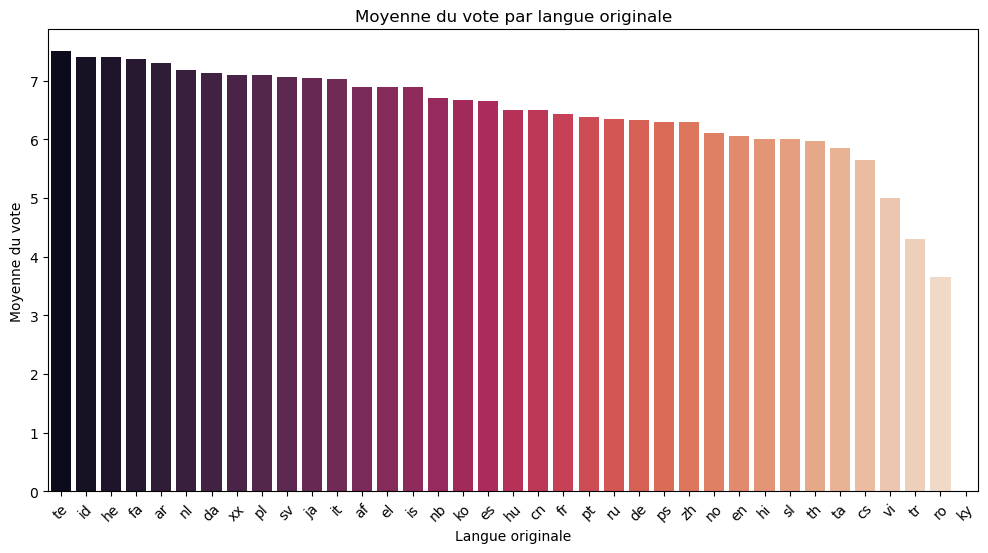

In [123]:
mean_rating_by_lang = data_movies.groupby('original_language')['vote_average'].mean().sort_values(ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=mean_rating_by_lang.index, y=mean_rating_by_lang.values, palette="rocket")
plt.xticks(rotation=45)
plt.ylabel("Moyenne du vote")
plt.xlabel("Langue originale")
plt.title("Moyenne du vote par langue originale")
plt.show()

Regroup : GRP 1 : [te,id,he,fa,ar,nl] GRP 2 : [da,xx,pl,sv,ja,it] ,GRP 3 [af,el,is] GRP 4 [nb,ko,es] 
GRP5 [hu,cn,fr,pt,ru,de,ps,zh] , GRP 6 [no,en,hi,sl,th,ta] , GRP 7 [vi,tr,ro] GRP 8 [ky]